## Variables, Imports, and Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

x_bar = np.mean(x)
y_bar = np.mean(y)

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

Text(0, 0.5, 'Water Drinks (Litre)')

# Question 1:
## Obtain the MSE for the following two lines:
1- y_pred[i] = 0.7*x[i] + 0.3

2- y_pred[i] = 0.25163494*x[i] + 0.79880123



$MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$

In [6]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i+w0 for i in x]
    sum_squared_error = sum((y_pred-y)**2)
    N = len(y)
    mse = sum_squared_error/N
    return mse


# Via my calculations
print("#1 MSE via my calculations: ", min_sq_error(y, x, 0.7, 0.3))
print("#2 MSE via my calculations: ", min_sq_error(y, x, 0.25163494, 0.79880123))

# Verify via Numpy
y_pred1 = [0.7*i+0.3 for i in x]
y_pred2 = [0.25163494*i+0.79880123 for i in x]
MSE1 = np.square(np.subtract(y,y_pred1)).mean() 
MSE2 = np.square(np.subtract(y,y_pred2)).mean() 

print("\n#1 MSE via Numpy: ", MSE1)
print("#2 MSE via Numpy: ", MSE2)


#1 MSE via my calculations:  6.518593101764703
#2 MSE via my calculations:  0.15385767404191164

#1 MSE via Numpy:  6.518593101764704
#2 MSE via Numpy:  0.15385767404191164


# Question 2: Obtain the best line

1- Compute:

$\frac{\partial MSE}{\partial w_1}$

and

$\frac{\partial MSE}{\partial w_0}$

2- then obtain $w_1$ and $w_0$ such that:

$\frac{\partial MSE}{\partial w_1} = 0$

and

$\frac{\partial MSE}{\partial w_0} = 0$

<img style="float:left;transform: rotate(90deg); width:1000px" src="ql-final-q2.jpg" />


# Question 3: Return the slope and intercept

In [5]:
def slope_intercept_LR(x, y, step, epochs):
    w1=0 
    w0=0
    n=len(y)
    for i in range(epochs):
        y_pred = w1*x[i]+w0
        p_der_w1 = ( -2/n * sum(x * (y - y_pred)))
        p_der_w0 = ( -2/n * sum((y - y_pred)))
        w1 = w1 - (step * p_der_w1)
        w0 = w0 - (step * p_der_w0)
        return w1, w0

print(slope_intercept_LR(x, y, 0.01, 5000))


(0.32237358117647047, 0.047324705882352935)


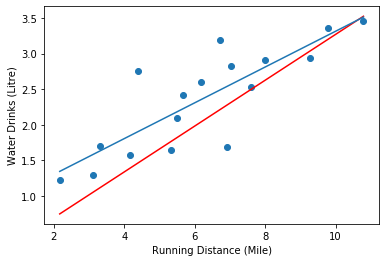

In [7]:
y_pred = 0.32237358117647047*x+0.047324705882352935

#My line of best fit
plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # regression line

# Actual line of best fit using built in functionality
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Question 4: Obtain the variance and mean of error

In [74]:
for i in range(len(y)):
    e = y_pred - y[i]

print(e)
print(np.var(e))
print(np.mean(e))

[-0.18884248  0.16576846  0.5203794   0.91045144  0.98137362  0.09097779
  1.89981596  0.74023818  1.19414019 -0.55409174  1.01747946  2.22605802
  0.46009554  1.32534623  0.57002493  1.7357278  -0.25331719]
0.5696891824798184
0.7553897430305875


## Plot the distribution of the error for optimal line

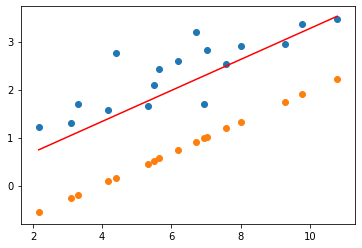

In [100]:
plt.scatter(x, y)
plt.scatter(x, e)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # regression line

# Question 5: Update the slope and intercept through iteration

In [8]:
import numpy as np

w_0 = np.random.randn()
w_1 = np.random.randn()
step = 0.01
epoch = 5000
y_pred = w_1*x+w_0
for _ in range(epoch):
    w_1 = w_1 - step*( -2/len(y) * sum(x * (y - y_pred)))
    w_0 = w_0 - step*( -2/len(y) * sum(y - y_pred))
print(w_1)
print(w_0)

537.8583286903549
72.10320386821442
